# Init



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from icecream import ic

from Lineaire.Linear import *
from Loss.CELoss import CELoss
from Activation.ReLu import ReLU
from Activation.SoftMax import SoftMax
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import SGD
from Encapsulation import fonctions as fn
from Convolution.Convolution1D import *
from Convolution.Convolution2D import *
from Convolution.Flatten import Flatten


from utils import tools as tl


In [4]:
def evaluer(net, couts):
    plt.plot(np.arange(len(couts)), couts, color='red', label="Evolution du cout")
    plt.xlabel("iter")
    plt.title("variation de la fonction de cout")

    _, alltrainy = load_usps(uspsdatatrain)
    _, alltesty = load_usps(uspsdatatest)

    alltrainy = alltrainy[:nb_train]
    alltesty = alltesty[:nb_test]

    predict = net.forward(alltrainx)
    # print((np.where(predict == alltrainy, 1, 0)).mean() )
    score_train = fn.score(alltrainy, predict)
    print("Le score d'accuracy en train = ", score_train)

    predict = net.forward(alltestx)
    score_test = fn.score(alltesty,predict)
    print("Le score d'accuracy en test = ", score_test)

# Conv1D

In [9]:
uspsdatatrain = "dataset/USPS_train.txt"
uspsdatatest = "dataset/USPS_test.txt" 

alltrainx, alltrainy = tl.load_usps(uspsdatatrain)
alltestx, alltesty = tl.load_usps(uspsdatatest)


nb_train = 1100
nb_test = 500

alltrainx, alltrainy = alltrainx[:nb_train],alltrainy[:nb_train]
alltestx, alltesty = alltestx[:nb_test],alltesty[:nb_test]

alltrainy = fn.transform_one_hot(alltrainy)
alltesty= fn.transform_one_hot(alltesty)
alltrainx = alltrainx.reshape(alltrainx.shape[0], alltrainx.shape[1], 1)
alltestx = alltestx.reshape(alltestx.shape[0], alltestx.shape[1], 1)


In [10]:
iteration = 100
gradient_step = 1e-3
nb_batches = 1

net = Sequentiel(*[Conv1D(3, 1, 32, stride=1),
                      MaxPool1D(2, 2),
                      Flatten(),
                      Linear(4064, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()


In [11]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=nb_batches, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1100, 256, 1)
ic| Y.shape: (1100, 10)
100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Le score d'accuracy en train =  0.519090909090909
Le score d'accuracy en train =  0.51


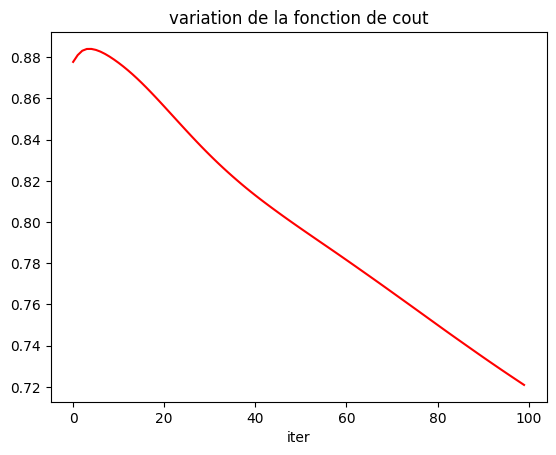

In [12]:
evaluer(net, couts, iteration)

## Tests 2

In [10]:
iteration = 100
gradient_step = 1e-3
nb_batches = 100

net = Sequentiel(*[Conv1D(3, 1, 32, stride=1),
                      MaxPool1D(2, 2),
                      Flatten(),
                      Linear(4064, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()


In [11]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=nb_batches, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1100, 256, 1)
ic| Y.shape: (1100, 10)
100%|██████████| 100/100 [04:06<00:00,  2.46s/it]


Le score d'accuracy en train =  0.5745454545454546
Le score d'accuracy en test =  0.548


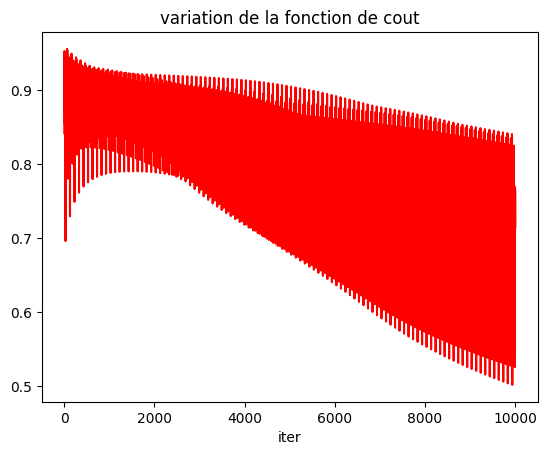

In [15]:
evaluer(net, couts, iteration)

# Conv2D

In [ ]:
uspsdatatrain = "dataset/USPS_train.txt"
uspsdatatest = "dataset/USPS_test.txt" 

alltrainx, alltrainy = tl.load_usps(uspsdatatrain)
alltestx, alltesty = tl.load_usps(uspsdatatest)

nb_train = 1000
nb_test = 200

alltrainx, alltrainy = alltrainx[:nb_train],alltrainy[:nb_train]
alltestx, alltesty = alltestx[:nb_test],alltesty[:nb_test]

alltrainy = fn.transform_one_hot(alltrainy)
alltesty= fn.transform_one_hot(alltesty)

alltrainx=alltrainx.reshape(alltrainx.shape[0],16,16,1)
alltestx=alltestx.reshape(alltestx.shape[0],16,16,1)


## Test 1

In [10]:
iteration = 150
gradient_step = 1e-2
nb_batches = 1

net = Sequentiel(*[Conv2D(3, 1, 32, stride=1),
                      MaxPool2D(2, 2),
                      Flatten(),
                      Linear(1568, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()

In [11]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=nb_batches, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1000, 16, 16, 1)
ic| Y.shape: (1000, 10)
100%|██████████| 150/150 [01:03<00:00,  2.36it/s]


Le score d'accuracy en train =  0.54
Le score d'accuracy en test =  0.475


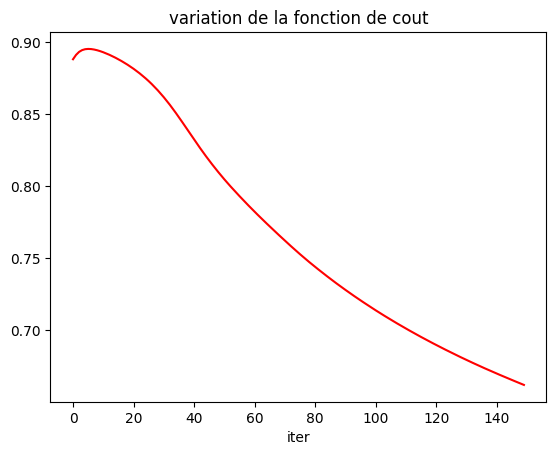

In [12]:
evaluer(net, couts, iteration)

## Test 2

In [17]:
iteration = 160
gradient_step = 1e-1
batch_size = 1

net = Sequentiel(*[Conv2D(3, 1, 32, stride=1),
                      MaxPool2D(2, 2),
                      Flatten(),
                      Linear(1568, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()

In [18]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=nb_batches, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1000, 16, 16, 1)
ic| Y.shape: (1000, 10)
100%|██████████| 160/160 [01:03<00:00,  2.54it/s]


Le score d'accuracy en train =  0.571
Le score d'accuracy en test =  0.5


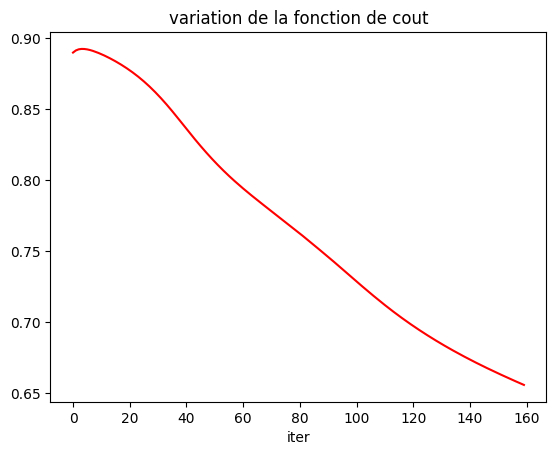

In [19]:
evaluer(net, couts, iteration)

## Test 3

In [10]:
iteration = 160
gradient_step = 1e-2
batch_size = 50

net = Sequentiel(*[Conv2D(3, 1, 32, stride=1),
                      MaxPool2D(2, 2),
                      Flatten(),
                      Linear(1568, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()

In [11]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=batch_size, loss=loss_ce, nb_epochs=iteration, shuffle=True)

ic| X.shape: (1000, 16, 16, 1)
ic| Y.shape: (1000, 10)
100%|██████████| 160/160 [03:37<00:00,  1.36s/it]


Le score d'accuracy en train =  0.499
Le score d'accuracy en test =  0.445


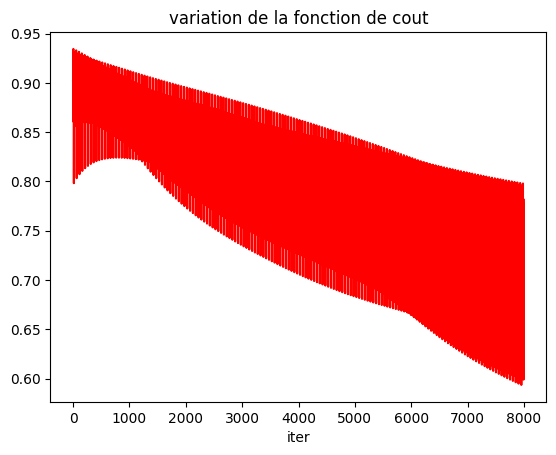

In [12]:
evaluer(net, couts, iteration)

## Test 4

In [22]:
iteration = 160
gradient_step = 1e-1
batch_size = 50

net = Sequentiel(*[Conv2D(3, 1, 32, stride=1),
                      MaxPool2D(2, 2),
                      Flatten(),
                      Linear(1568, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()


In [23]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=batch_size, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1000, 16, 16, 1)
ic| Y.shape: (1000, 10)
100%|██████████| 160/160 [03:10<00:00,  1.19s/it]


Le score d'accuracy en train =  0.571
Le score d'accuracy en test =  0.5


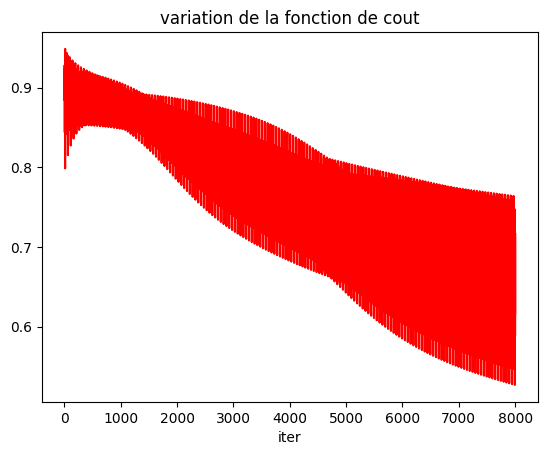

In [24]:
evaluer(net, couts, iteration)

## Test 5 (meilleur)

In [12]:
iteration = 165
gradient_step = 1e-1
batch_size = 100

net = Sequentiel(*[Conv2D(3, 1, 32, stride=1),
                      MaxPool2D(2, 2),
                      Flatten(),
                      Linear(1568, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()


In [13]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=1, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1000, 16, 16, 1)
ic| Y.shape: (1000, 10)
100%|██████████| 165/165 [01:11<00:00,  2.32it/s]


Le score d'accuracy en train =  0.598
Le score d'accuracy en train =  0.51


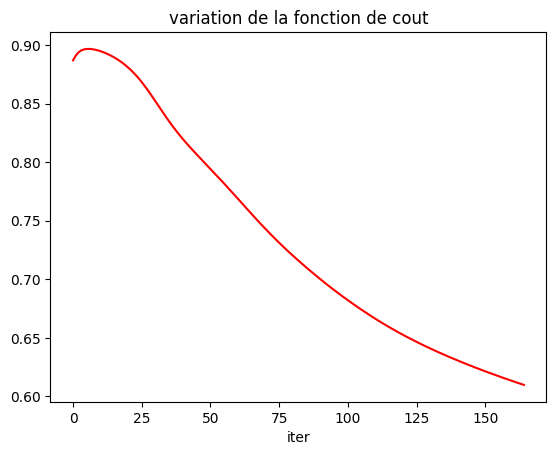

In [14]:
evaluer(net, couts, iteration)

## Test 6

In [16]:
iteration = 165
gradient_step = 1e-1
nb_batches = 100

net = Sequentiel(*[Conv2D(3, 1, 32, stride=1),
                      MaxPool2D(2, 2),
                      Flatten(),
                      Linear(1568, 100, init_type=1),
                      ReLU(),
                      Linear(100, 10,init_type=1),
                      SoftMax()
                        ])

loss_ce = CELoss()


In [17]:
net, couts, opt = SGD(net, alltrainx, alltrainy, nb_batch=nb_batches, loss=loss_ce, nb_epochs=iteration,shuffle=True)

ic| X.shape: (1000, 16, 16, 1)
ic| Y.shape: (1000, 10)
100%|██████████| 165/165 [05:51<00:00,  2.13s/it]


Le score d'accuracy en train =  0.58
Le score d'accuracy en test =  0.505


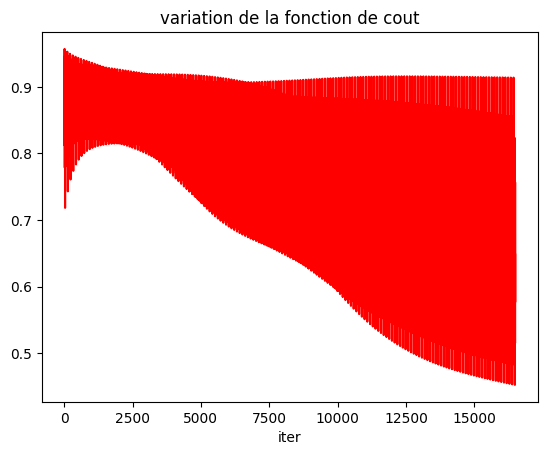

In [18]:
evaluer(net, couts, iteration)

## Note
Certains graphes sont différents parce que parfois on sauvegardait la loss après chaque mise à jour du gradient et autrefois après chaque époch (donc parfois on avait plus de valeurs) 